## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  38.920728  1714.058639  0.686290  10.750271  1.531944
1  70.260639  1684.364648  0.331344   9.944261  1.413707
2  75.854413   418.129894  0.465295   9.349464  1.108752
3   4.969462   934.027914  0.723909   1.839045  1.513713
4  73.270248  1375.877987  0.478116   3.915564  1.451232


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9689286	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9592922	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9504910	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9403372	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9331227	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9221878	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9129061	total: 60ms	remaining: 8.52s
7:	learn: 0.9016292	total: 60.5ms	remaining: 7.5s
8:	learn: 0.8924518	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8821404	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8750302	total: 61.8ms	remaining: 5.55s
11:	learn: 0.8669646	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8596935	total: 62.6ms	remaining: 4.76s
13:	learn: 0.8517590	total: 63.1ms	remaining: 4.44s
14:	learn: 0.8425775	total: 63.4ms	remaining: 4.16s
15:	learn: 0.8343371	total: 63.9ms	remaining: 3.93s
16:	learn: 0.8256874	total: 64.4ms	remaining: 3.72s
17:	learn: 0.8180739	total: 64.7ms	remaining: 3.53s
18:	learn: 0.8135883	total: 65.1ms	remaining: 3

115:	learn: 0.3878229	total: 107ms	remaining: 813ms
116:	learn: 0.3853411	total: 107ms	remaining: 809ms
117:	learn: 0.3830753	total: 108ms	remaining: 805ms
118:	learn: 0.3804683	total: 108ms	remaining: 802ms
119:	learn: 0.3776431	total: 109ms	remaining: 797ms
120:	learn: 0.3760281	total: 109ms	remaining: 793ms
121:	learn: 0.3740330	total: 110ms	remaining: 789ms
122:	learn: 0.3711927	total: 110ms	remaining: 784ms
123:	learn: 0.3695531	total: 110ms	remaining: 779ms
124:	learn: 0.3669142	total: 111ms	remaining: 775ms
125:	learn: 0.3644331	total: 111ms	remaining: 772ms
126:	learn: 0.3620105	total: 112ms	remaining: 770ms
127:	learn: 0.3591584	total: 112ms	remaining: 766ms
128:	learn: 0.3564923	total: 113ms	remaining: 762ms
129:	learn: 0.3539819	total: 113ms	remaining: 758ms
130:	learn: 0.3519404	total: 114ms	remaining: 754ms
131:	learn: 0.3494373	total: 114ms	remaining: 750ms
132:	learn: 0.3473685	total: 114ms	remaining: 746ms
133:	learn: 0.3451735	total: 115ms	remaining: 743ms
134:	learn: 

293:	learn: 0.1558807	total: 185ms	remaining: 445ms
294:	learn: 0.1553305	total: 186ms	remaining: 444ms
295:	learn: 0.1547211	total: 186ms	remaining: 443ms
296:	learn: 0.1542014	total: 186ms	remaining: 441ms
297:	learn: 0.1535766	total: 187ms	remaining: 440ms
298:	learn: 0.1530871	total: 187ms	remaining: 439ms
299:	learn: 0.1527591	total: 187ms	remaining: 437ms
300:	learn: 0.1522937	total: 188ms	remaining: 436ms
301:	learn: 0.1519019	total: 188ms	remaining: 435ms
302:	learn: 0.1513467	total: 189ms	remaining: 434ms
303:	learn: 0.1508732	total: 189ms	remaining: 433ms
304:	learn: 0.1499889	total: 189ms	remaining: 432ms
305:	learn: 0.1495272	total: 190ms	remaining: 431ms
306:	learn: 0.1488235	total: 190ms	remaining: 430ms
307:	learn: 0.1483858	total: 191ms	remaining: 429ms
308:	learn: 0.1477671	total: 191ms	remaining: 427ms
309:	learn: 0.1473899	total: 192ms	remaining: 426ms
310:	learn: 0.1466950	total: 192ms	remaining: 425ms
311:	learn: 0.1460976	total: 192ms	remaining: 424ms
312:	learn: 

527:	learn: 0.0657031	total: 288ms	remaining: 257ms
528:	learn: 0.0653305	total: 289ms	remaining: 257ms
529:	learn: 0.0652214	total: 289ms	remaining: 256ms
530:	learn: 0.0651140	total: 289ms	remaining: 256ms
531:	learn: 0.0650080	total: 290ms	remaining: 255ms
532:	learn: 0.0646238	total: 290ms	remaining: 254ms
533:	learn: 0.0643326	total: 291ms	remaining: 254ms
534:	learn: 0.0642293	total: 291ms	remaining: 253ms
535:	learn: 0.0639459	total: 291ms	remaining: 252ms
536:	learn: 0.0635883	total: 292ms	remaining: 252ms
537:	learn: 0.0634283	total: 292ms	remaining: 251ms
538:	learn: 0.0632279	total: 293ms	remaining: 250ms
539:	learn: 0.0631275	total: 293ms	remaining: 250ms
540:	learn: 0.0629421	total: 294ms	remaining: 249ms
541:	learn: 0.0625935	total: 294ms	remaining: 248ms
542:	learn: 0.0623988	total: 294ms	remaining: 248ms
543:	learn: 0.0623007	total: 295ms	remaining: 247ms
544:	learn: 0.0621266	total: 295ms	remaining: 246ms
545:	learn: 0.0620163	total: 295ms	remaining: 246ms
546:	learn: 

706:	learn: 0.0388621	total: 367ms	remaining: 152ms
707:	learn: 0.0387487	total: 367ms	remaining: 151ms
708:	learn: 0.0386518	total: 368ms	remaining: 151ms
709:	learn: 0.0384983	total: 368ms	remaining: 150ms
710:	learn: 0.0383686	total: 369ms	remaining: 150ms
711:	learn: 0.0382785	total: 369ms	remaining: 149ms
712:	learn: 0.0381286	total: 370ms	remaining: 149ms
713:	learn: 0.0379136	total: 371ms	remaining: 148ms
714:	learn: 0.0377975	total: 371ms	remaining: 148ms
715:	learn: 0.0377044	total: 371ms	remaining: 147ms
716:	learn: 0.0376174	total: 372ms	remaining: 147ms
717:	learn: 0.0374069	total: 372ms	remaining: 146ms
718:	learn: 0.0372801	total: 373ms	remaining: 146ms
719:	learn: 0.0371549	total: 373ms	remaining: 145ms
720:	learn: 0.0370312	total: 373ms	remaining: 145ms
721:	learn: 0.0369107	total: 374ms	remaining: 144ms
722:	learn: 0.0367877	total: 374ms	remaining: 143ms
723:	learn: 0.0367019	total: 375ms	remaining: 143ms
724:	learn: 0.0365843	total: 375ms	remaining: 142ms
725:	learn: 

939:	learn: 0.0196749	total: 470ms	remaining: 30ms
940:	learn: 0.0196260	total: 470ms	remaining: 29.5ms
941:	learn: 0.0195441	total: 471ms	remaining: 29ms
942:	learn: 0.0195068	total: 471ms	remaining: 28.5ms
943:	learn: 0.0194214	total: 472ms	remaining: 28ms
944:	learn: 0.0193736	total: 472ms	remaining: 27.5ms
945:	learn: 0.0193267	total: 473ms	remaining: 27ms
946:	learn: 0.0192483	total: 473ms	remaining: 26.5ms
947:	learn: 0.0191959	total: 474ms	remaining: 26ms
948:	learn: 0.0191600	total: 474ms	remaining: 25.5ms
949:	learn: 0.0191267	total: 475ms	remaining: 25ms
950:	learn: 0.0190813	total: 475ms	remaining: 24.5ms
951:	learn: 0.0189949	total: 476ms	remaining: 24ms
952:	learn: 0.0189603	total: 476ms	remaining: 23.5ms
953:	learn: 0.0189214	total: 477ms	remaining: 23ms
954:	learn: 0.0188769	total: 477ms	remaining: 22.5ms
955:	learn: 0.0188386	total: 477ms	remaining: 22ms
956:	learn: 0.0188008	total: 478ms	remaining: 21.5ms
957:	learn: 0.0187573	total: 478ms	remaining: 21ms
958:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

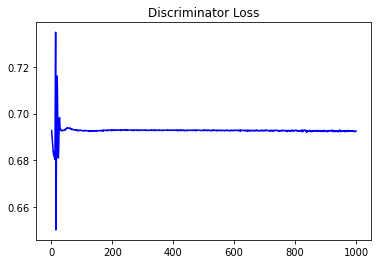

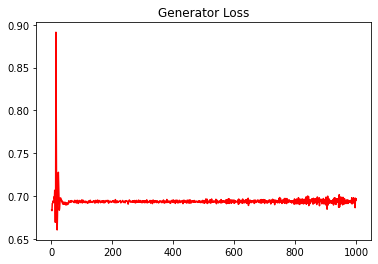

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.27232276255004156


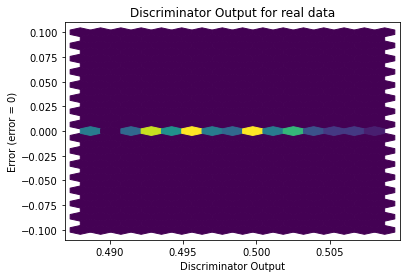

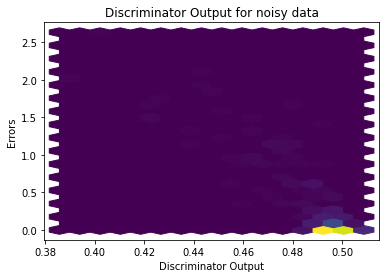

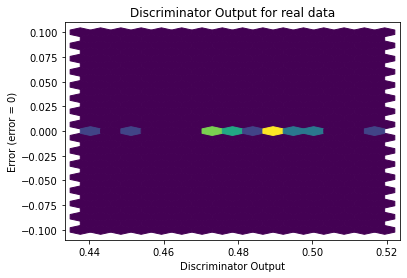

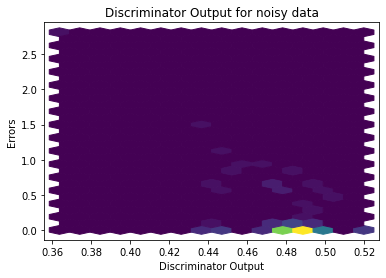

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


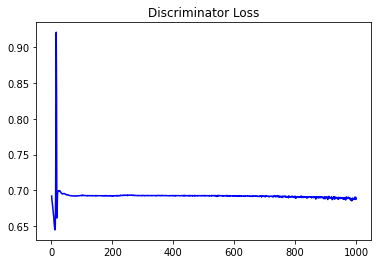

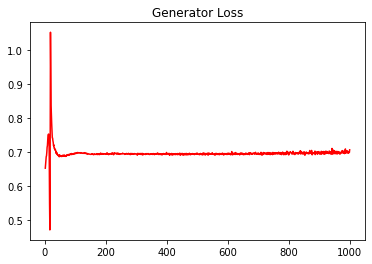

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3090714006935818


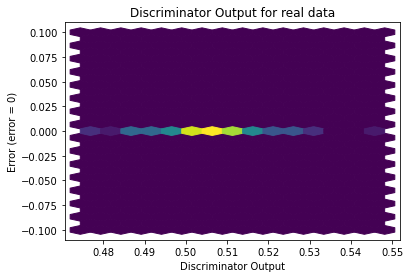

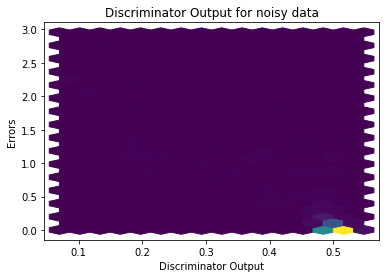

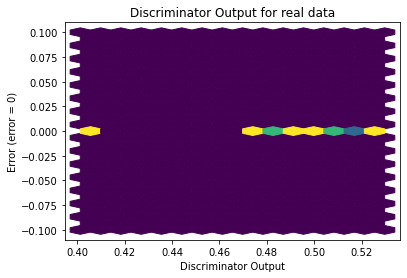

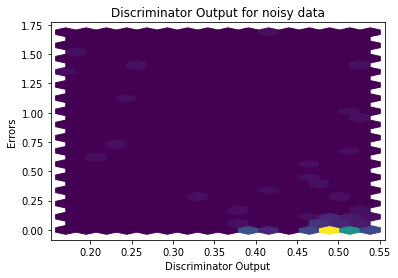

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0864]], requires_grad=True)
